In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset.csv")

In [4]:
df.head()

,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled,Target
0,0,1,0,0,0.369231,0
1,1,0,1,0,0.046154,0
2,0,1,0,0,0.353846,0
3,1,0,0,0,0.615385,0
4,0,1,0,0,0.338462,0


Target
0    69878
1    32473
dtype: int64


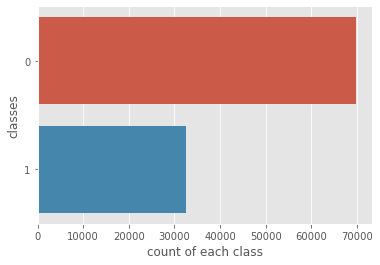

In [9]:
#Print class freq. through pandas 
print(df.groupby('Target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.Target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [11]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
column_names = list(X) 
y = df.iloc[:,-1] 

#X.head()
#y.head()

In [12]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(71645, 5)


In [13]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l1','l2'] , "max_iter":[1000]}

In [14]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [15]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

In [16]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.670563 using {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1'}
0.000000 (0.000000) with: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
0.628732 (0.014507) with: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1'}
0.670563 (0.001062) with: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1'}
0.661745 (0.001215) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}
0.660044 (0.001565) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
0.660044 (0.001565) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


In [17]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [18]:
print(gs.best_estimator_.coef_)
print(X_train.columns)

[[-2.54812257  1.92456232 -1.02723307  0.24101828 -0.95895596]]
Index(['Prev_Insured_binary', 'Vehicle_damage_binary', '< 1 Year', '> 2 Years',
       'Age_scaled'],
      dtype='object')


In [19]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6682732447817836
--
***RESULTS ON TEST SET***
f1_score:  0.6649186738956536


In [20]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81     20964
           1       0.59      0.77      0.66      9742

    accuracy                           0.75     30706
   macro avg       0.73      0.76      0.74     30706
weighted avg       0.78      0.75      0.76     30706



In [21]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15685  5279]
 [ 2261  7481]]


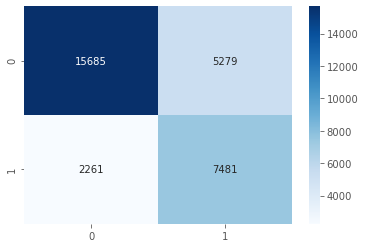

In [23]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


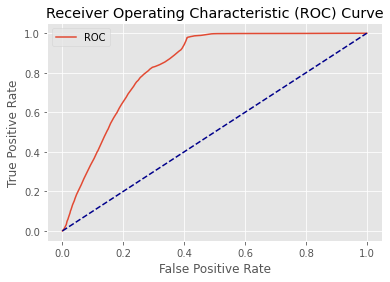

AUC: 0.83


In [24]:
from sklearn import metrics

model = LogisticRegression(C=0.01,solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)